In [1]:
1. problem statement
2.data collection
3. data exploration
4.data cleaning
5. data transformatiom
6.data visualizatin

SyntaxError: invalid decimal literal (429194700.py, line 2)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.io as pio

In [3]:
df = pd.read_csv("customer_acquisition_data.csv")

In [4]:
df

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


In [5]:
df.sample(5)

,customer_id,channel,cost,conversion_rate,revenue
428,429,paid advertising,30.450327,0.016341,4598
178,179,paid advertising,30.450327,0.016341,1249
185,186,social media,9.546326,0.167592,2715
267,268,referral,8.320327,0.123145,4923
298,299,social media,9.546326,0.167592,1089


In [6]:
df.isnull().sum()

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df1 = df.copy()

In [12]:
df.drop(["channel"  , "cost" , "conversion_rate"] , axis = 1 , inplace = True)
df

KeyError: "['channel', 'cost', 'conversion_rate'] not found in axis"

In [17]:
df.drop("revenue",  axis = 1, inplace = True)

# 1. Make Visualization for the distribuition of Customer Acquistion Cost.

In [19]:
df1

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


In [9]:
fig = px.histogram(df , x = "cost" , title = "Distribution of Customer Acquisition Cost" ,labels={'cost':'Customer Acquisition Cost'}, color_discrete_sequence=['blue'] )
fig.show()

<Axes: xlabel='cost', ylabel='Count'>

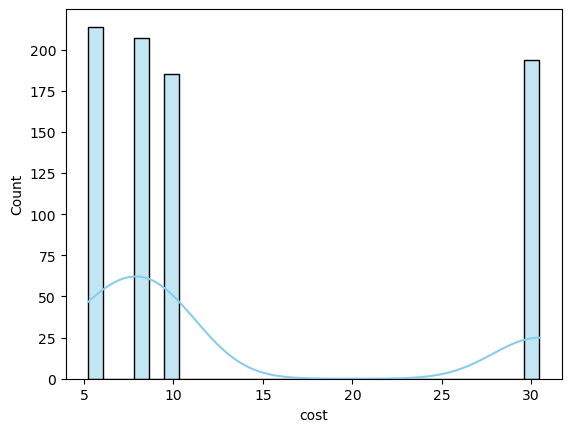

In [10]:
sns.histplot(df['cost'] , kde = True , bins = 30 , color = 'skyblue')

# 2. Create a Visualization for the revenue by the customer. 

In [11]:
fig = px.histogram(df , x = "revenue" )
fig.show()

# 3. Compare The Cost of acquistions across various channels and determine which ones are the most and last profitable?

In [12]:
df['channel'].unique()

array(['referral', 'paid advertising', 'email marketing', 'social media'],
      dtype=object)

In [13]:
df["Profit"] = df["revenue"]-df["cost"]
df["Profit"]

0      4190.679673
1      3379.549673
2      3158.753737
3      1510.453674
4      2410.679673
          ...     
795    2803.453674
796    3433.753737
797    2091.453674
798     782.549673
799    4814.753737
Name: Profit, Length: 800, dtype: float64

In [14]:
df["profit"] = df["revenue"]- df["cost"]

In [16]:
fig = px.bar(df , x = "channel" , y = ["Profit" , "cost"] , title = 'Cost of Acquisition and Profit by Channel' , 
             labels={'value':'Amount (USD)', 'Channel':'Channel'}, 
             barmode='group', color_discrete_sequence=['green', 'orange'])
fig.show()

# 4. Find Out which channels are most and  least effective at cost

In [17]:
most_cost_effective = df.groupby("channel")["cost"].sum().reset_index()

In [18]:
fig = px.bar(most_cost_effective , x = "channel" , y = "cost" , title = "channel cost effective")
fig.show()

In [19]:
df

,customer_id,channel,cost,conversion_rate,revenue,Profit,profit
0,1,referral,8.320327,0.123145,4199,4190.679673,4190.679673
1,2,paid advertising,30.450327,0.016341,3410,3379.549673,3379.549673
2,3,email marketing,5.246263,0.043822,3164,3158.753737,3158.753737
3,4,social media,9.546326,0.167592,1520,1510.453674,1510.453674
4,5,referral,8.320327,0.123145,2419,2410.679673,2410.679673
...,...,...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813,2803.453674,2803.453674
796,797,email marketing,5.246263,0.043822,3439,3433.753737,3433.753737
797,798,social media,9.546326,0.167592,2101,2091.453674,2091.453674
798,799,paid advertising,30.450327,0.016341,813,782.549673,782.549673


# 5. Calculate the total revenue by channel and analyze the most and least Profit channels in term of generating revenue 

In [20]:
revenue_by_channel = df.groupby("channel")["revenue"].sum().reset_index()

In [21]:
fig = px.bar(revenue_by_channel , x = "channel" , y ="revenue" , title = "Total revenue by channel and most cost revenue" ,
            )
fig.show()

# 6 . calculate the return on investment for each Channel.

In [49]:
df["ROI"] = (df["Profit"] / df["cost"])*100

In [50]:
df["ROI"] 

0      50366.768135
1      11098.566032
2      60209.592493
3      15822.356443
4      28973.377499
           ...     
795    29366.834654
796    65451.418642
797    21908.467688
798     2569.922048
799    91774.916503
Name: ROI, Length: 800, dtype: float64

In [63]:
profit_channel = df.groupby("channel")["ROI"].mean().reset_index()
profit_channel 

,channel,ROI
0,email marketing,53761.745510
1,paid advertising,9183.261508
2,referral,32969.121271
3,social media,27796.228953


In [64]:
fig = px.bar(df, x='channel', y='ROI', title='Total Return on Investment (ROI) by Channel',
             labels={'channel': 'Channel', 'ROI': 'ROI (%)'},
             color='ROI', color_continuous_scale='Viridis')
fig.show()